In [3]:
#이미지 경로 저장
import glob
images = glob.glob('C:/Users/ARA/graph/*.png')

In [4]:
images

['C:/Users/ARA/graph\\graph1.png',
 'C:/Users/ARA/graph\\graph2.png',
 'C:/Users/ARA/graph\\graph3.png',
 'C:/Users/ARA/graph\\graph4.png']

In [6]:
import cv2

In [7]:
#이미지 데이터 저장
train_data=[]
for fname in images:
    fimage = cv2.imread(fname, cv2.IMREAD_GRAYSCALE)
    cv2.imshow('img', fimage)
    train_data.append(fimage)
    
    cv2.waitKey(0)
    cv2.destroyAllWindows()

In [8]:
import numpy as np
X_train = np.array(train_data)
X_train.shape

(4, 238, 356)

In [95]:
X_train[1][1]

array([255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
       255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
       255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
       255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
       255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
       255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
       255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
       255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
       255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
       255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
       255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
       255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
       255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
       255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 25

In [1]:
import tensorflow

In [72]:
# Building the model
from keras.models import Model, load_model
from keras.layers import Input, Dense
from keras.callbacks import ModelCheckpoint, TensorBoard
from keras import regularizers
input_dim1 = X_train.shape[1]
input_dim2 = X_train.shape[2]
input_dim = input_dim1 * input_dim2
encoding_dim = 128


In [73]:
X_train.shape

(4, 238, 356)

In [74]:
X_train_re= X_train.reshape(4, input_dim)
X_train_re.shape

(4, 84728)

In [75]:
input_layer = Input(shape=(input_dim,))

In [76]:
encoder = Dense(encoding_dim, activation="tanh", 
                activity_regularizer=regularizers.l1(10e-5))(input_layer)
encoder = Dense(int(encoding_dim / 2), activation="relu")(encoder)
decoder = Dense(int(encoding_dim / 2), activation='tanh')(encoder)
decoder = Dense(input_dim, activation='relu')(decoder)
autoencoder = Model(inputs=input_layer, outputs=decoder)

In [81]:
nb_epoch = 30
batch_size = 4
autoencoder.compile(optimizer='adam', 
                    loss='binary_crossentropy', 
                    metrics=['accuracy'])

In [82]:
checkpointer = ModelCheckpoint(filepath="model.h5",
                               verbose=0,
                               save_best_only=True)

In [83]:
tensorboard = TensorBoard(log_dir='./logs',
                          histogram_freq=0,
                          write_graph=True,
                          write_images=True)
history = autoencoder.fit(X_train_re, X_train_re,
                    epochs=nb_epoch,
                    batch_size=batch_size,
                    shuffle=True,
                    validation_data=(X_train_re, X_train_re),
                    verbose=1,
                    callbacks=[checkpointer, tensorboard]).history

Train on 4 samples, validate on 4 samples
Epoch 1/30
4/4 [==============================] - 1s 161ms/step - loss: -1266.2845 - acc: 0.0000e+00 - val_loss: -1268.6514 - val_acc: 0.0000e+00
Epoch 2/30
4/4 [==============================] - 0s 96ms/step - loss: -1268.6514 - acc: 0.0000e+00 - val_loss: -1270.0675 - val_acc: 0.0000e+00
Epoch 3/30
4/4 [==============================] - 0s 91ms/step - loss: -1270.0675 - acc: 0.0000e+00 - val_loss: -1271.2538 - val_acc: 0.0000e+00
Epoch 4/30
4/4 [==============================] - 0s 91ms/step - loss: -1271.2538 - acc: 0.0000e+00 - val_loss: -1272.3469 - val_acc: 0.0000e+00
Epoch 5/30
4/4 [==============================] - 0s 93ms/step - loss: -1272.3468 - acc: 0.0000e+00 - val_loss: -1273.5756 - val_acc: 0.0000e+00
Epoch 6/30
4/4 [==============================] - 0s 97ms/step - loss: -1273.5756 - acc: 0.0000e+00 - val_loss: -1275.6437 - val_acc: 0.0000e+00
Epoch 7/30
4/4 [==============================] - 0s 91ms/step - loss: -1275.6438 - acc

In [91]:
autoencoder.fit(X_train_re, X_train_re, epochs=10, batch_size=4, shuffle=True)

Epoch 1/10
4/4 [==============================] - 0s 96ms/step - loss: -1310.7875 - acc: 0.0000e+00
Epoch 2/10
4/4 [==============================] - 0s 88ms/step - loss: -1315.4529 - acc: 0.0000e+00
Epoch 3/10
4/4 [==============================] - 0s 86ms/step - loss: -1320.9386 - acc: 0.0000e+00
Epoch 4/10
4/4 [==============================] - 0s 99ms/step - loss: -1326.2355 - acc: 0.0000e+00
Epoch 5/10
4/4 [==============================] - 0s 99ms/step - loss: -1329.7985 - acc: 0.0000e+00
Epoch 6/10
4/4 [==============================] - 0s 87ms/step - loss: -1332.0468 - acc: 0.0000e+00
Epoch 7/10
4/4 [==============================] - 0s 103ms/step - loss: -1333.3024 - acc: 0.0000e+00
Epoch 8/10
4/4 [==============================] - 0s 100ms/step - loss: -1334.1017 - acc: 0.0000e+00
Epoch 9/10
4/4 [==============================] - 0s 101ms/step - loss: -1334.7209 - acc: 0.0000e+00
Epoch 10/10
4/4 [==============================] - 0s 99ms/step - loss: -1335.1923 - acc: 0.0000e

In [92]:
# encode and decode some digits
# note that we take them from the *test* set
encoded_imgs = encoder.predict(X_train_re)
decoded_imgs = decoder.predict(encoded_imgs)

AttributeError: 'Tensor' object has no attribute 'predict'

In [93]:
decoded_imgs = autoencoder.predict(X_train_re)

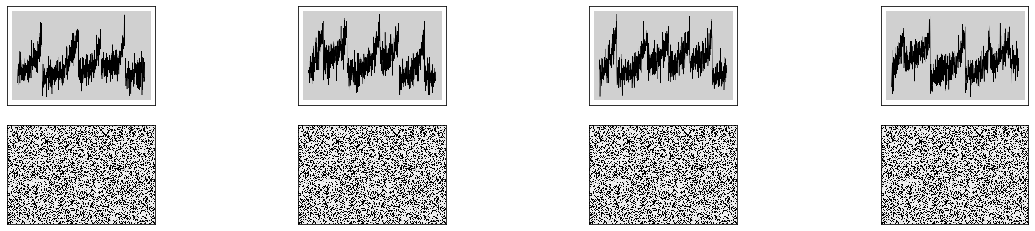

In [94]:
# use Matplotlib (don't ask)
import matplotlib.pyplot as plt

n = 4  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(X_train_re[i].reshape(input_dim1, input_dim2))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(input_dim1, input_dim2))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()